In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute, transpile
import tensorflow as tf

sys.path.append('../')

In [70]:
#load the actual hackthon data (fashion-mnist)
images=np.load('../data/images.npy')
labels=np.load('../data/labels.npy')

In [71]:
images_resized = np.resize(images, (2000,4,4))

In [72]:
max_images = np.max(np.abs(images_resized))
images_resized_normalized = images_resized/max_images

In [73]:
def encoder(image):
    info_image = np.ndarray.flatten(image)
    n_qubits = len(info_image)
    q_register = QuantumRegister(n_qubits)
    qc = QuantumCircuit(q_register, name='Encoder')
    for i, pixel_value in enumerate(info_image):
            qc.rx(2*np.pi*pixel_value, q_register[i])
    return qc

In [84]:
def encoder_v2(image,threshold):
    info_image = np.ndarray.flatten(image)
    n_qubits = len(info_image)
    q_register = QuantumRegister(n_qubits)
    qc = QuantumCircuit(q_register, name='Encoder')
    for i, pixel_value in enumerate(info_image):
        if pixel_value>=threshold:
            qc.x( q_register[i])
    return qc

In [85]:
circuit = encoder_v2(images_resized_normalized[100],0.5)
circuit.draw()

q34_0: ─────
             
 q34_1: ─────
             
 q34_2: ─────
             
 q34_3: ─────
             
 q34_4: ─────
             
 q34_5: ─────
        ┌───┐
 q34_6: ┤ X ├
        ├───┤
 q34_7: ┤ X ├
        ├───┤
 q34_8: ┤ X ├
        ├───┤
 q34_9: ┤ X ├
        ├───┤
q34_10: ┤ X ├
        ├───┤
q34_11: ┤ X ├
        ├───┤
q34_12: ┤ X ├
        ├───┤
q34_13: ┤ X ├
        └───┘
q34_14: ─────
             
q34_15: ─────

In [86]:
qr = QuantumRegister(16)
cr = ClassicalRegister(16)
qc = QuantumCircuit(qr,cr)
qc = circuit
qc.measure_all()
qc.draw()

░ ┌─┐                                             
  q34_0: ──────░─┤M├─────────────────────────────────────────────
               ░ └╥┘┌─┐                                          
  q34_1: ──────░──╫─┤M├──────────────────────────────────────────
               ░  ║ └╥┘┌─┐                                       
  q34_2: ──────░──╫──╫─┤M├───────────────────────────────────────
               ░  ║  ║ └╥┘┌─┐                                    
  q34_3: ──────░──╫──╫──╫─┤M├────────────────────────────────────
               ░  ║  ║  ║ └╥┘┌─┐                                 
  q34_4: ──────░──╫──╫──╫──╫─┤M├─────────────────────────────────
               ░  ║  ║  ║  ║ └╥┘┌─┐                              
  q34_5: ──────░──╫──╫──╫──╫──╫─┤M├──────────────────────────────
         ┌───┐ ░  ║  ║  ║  ║  ║ └╥┘┌─┐                           
  q34_6: ┤ X ├─░──╫──╫──╫──╫──╫──╫─┤M├───────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                        
  q34_7: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫─┤M├────────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                     
  q34_8: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐                  
  q34_9: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐               
 q34_10: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐            
 q34_11: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├────────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐         
 q34_12: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├─────────
         ├───┤ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q34_13: ┤ X ├─░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├──────
         └───┘ ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q34_14: ──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
               ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q34_15: ──────░──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫──╫─┤M├
               ░  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
meas: 16/═════════╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩══╩═
                  0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15

In [87]:
def execute_circuit(qc, shots=1024, device=None):
    if device is None:
        device = Aer.get_backend('qasm_simulator')
    else:
        device = device
    
    circ_trans = transpile(qc,device)
    counts = device.run(circ_trans, shots=shots).result().get_counts()
    
    return counts

In [88]:
hist = execute_circuit(qc)

In [89]:
def basis_states_probs(counts, shots=1024, n_qubits=1):
   probs = []
   basis_states = [np.binary_repr(i,width=n_qubits) for i in range(2**n_qubits)]

   for b in basis_states:
      c = counts.get(b)
      if c is None:
         probs.append(0)
      else:
         probs.append(counts[b]/shots)
   return probs

In [90]:
def decoder(hist):
    image = np.zeros((16))
    state = list(hist.keys())[0]
    y = str(state)
    for i,char in enumerate(list(y)):
        if int(char) == 0:
            image[i] = np.random.uniform(0,0.5)
        else:
            image[i] = np.random.uniform(0.5,1)
    decoded_image = np.reshape(image,(4,4))
    decoded_image_denormalized = decoded_image * max_images
    final_image = np.resize(decoded_image_denormalized,(28,28))
    return final_image

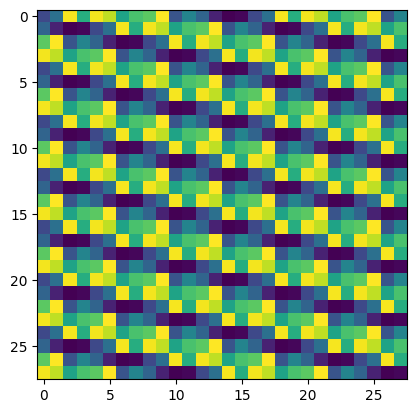

In [104]:
image = decoder(hist)
plt.imshow(image)

In [101]:
decoded_image = decoder(hist)

In [114]:
print(image_mse(np.random.random((28,28))*max_images,images[100]))

3.582756375356999e-06


In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
def image_mse(image1,image2):
    # Using sklearns mean squared error:
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
    return mean_squared_error(image1, image2)

In [99]:
def add_measurements(circuit):
    qr = QuantumRegister(16)
    cr = ClassicalRegister(16)
    qc = QuantumCircuit(qr,cr)
    qc = circuit
    qc.measure_all()
    return qc

In [103]:
#grade part1

n=len(images_resized_normalized)
mse=0
gatecount=0

for i in range(len(images_resized_normalized)):
    #encode image into circuit
    circuit=encoder_v2(images_resized_normalized[i],0.5)

    #Add measurements
    circuit = add_measurements(circuit)
    
    #simulate circuit
    histogram=execute_circuit(circuit)
    
    #reconstruct the image
    image_re=decoder(histogram)
    
    #calculate mse
    mse+=image_mse(images[i],image_re)
    
#fidelity of reconstruction
f=1-mse
gatecount=gatecount/n

#score for part1 
print(f*(0.999**gatecount))

0.9933702109824315


2000